In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import nltk
from wordcloud import WordCloud,STOPWORDS
from string import punctuation

In [3]:
# reads csv file
data=pd.read_csv("data/IMDB Dataset.csv")

In [4]:
print(data.shape)

(50000, 2)


In [5]:
#To display first 5 rows
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
#Summary of the dataset
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [7]:
#sentiment count
data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [8]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

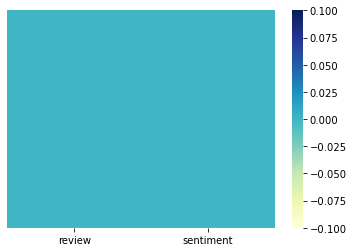

In [9]:
#Plotting using seaborn heatmap
sns.heatmap(data.isnull(), yticklabels=False, cmap="YlGnBu")

In [10]:
#Downloading essential datasets from nltk
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/vishnu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vishnu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vishnu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

# Preprocessing

In [12]:
#converting to lower case
data["review"] = data["review"].apply(lambda x: x.lower()) 

In [13]:
#removing html tags
clean_html = re.compile('<.*?>')
data["review"] = data["review"].apply(lambda x: re.sub(clean_html, "", x))

In [14]:
#removing everything instead of 0-9, a-z, A-Z
data["review"] = data["review"].apply(lambda x: re.sub("[^0-9a-zA-Z]"," ", x))

In [15]:
#lemmatizing
data["review"] = data["review"].apply(lambda x: lemmatizer.lemmatize(x))

In [16]:
#removing extra white spaces
data["review"] = data["review"].apply(lambda x: re.sub(" +"," ", x) )

In [17]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive


#  WordCloud for Positive Review Text

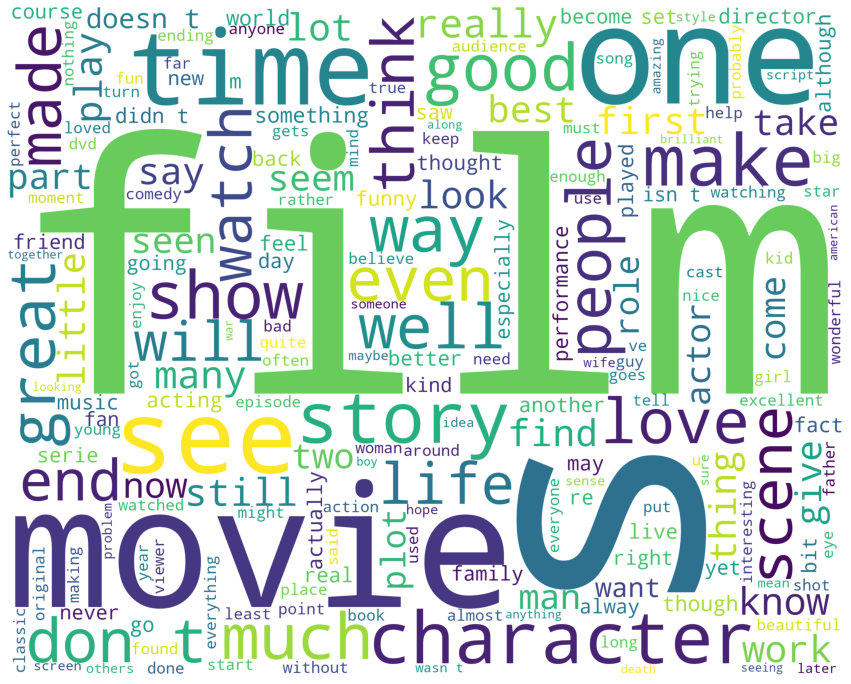

In [18]:
df_pos = data[data['sentiment']=='positive']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

# WordCloud for negative Review Text

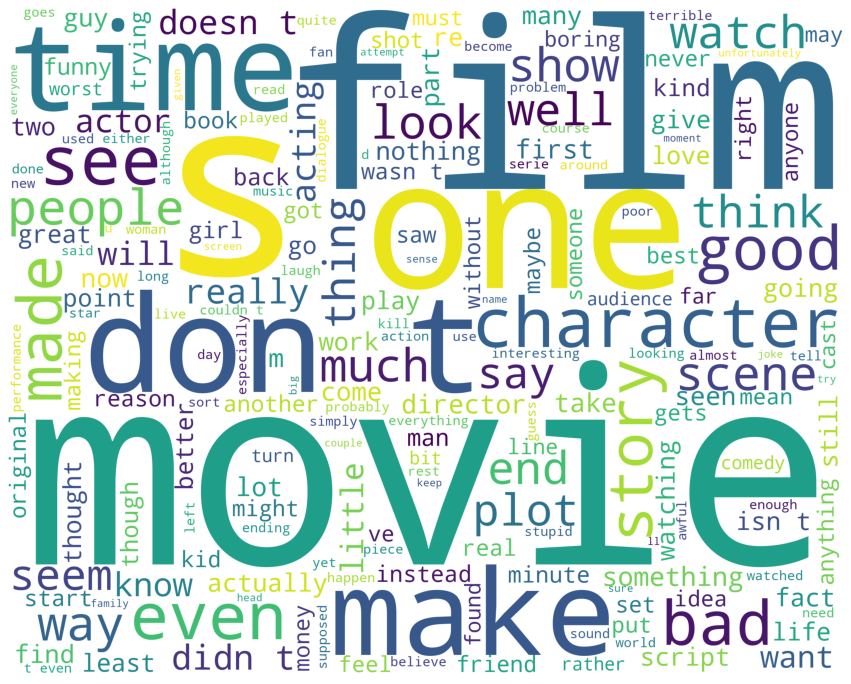

In [19]:
df_pos = data[data['sentiment']=='negative']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True,strip_accents='ascii', stop_words=stop_words)

In [21]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive


In [22]:
X = vectorizer.fit_transform(data["review"])

In [23]:
label_encoding = {"positive": 1, "negative": 0 }
label_decoding = { 1: "positive", 0: "negative" }

In [24]:
y = data["sentiment"].map(label_encoding).to_list()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
LR_classifier=LogisticRegression()
LR_classifier.fit(X_train,y_train)
ypred=LR_classifier.predict(X_test)
ypred

array([0, 1, 0, ..., 1, 0, 1])

In [27]:
LR_classifier.score(X_train,y_train)

0.935

In [28]:
LR_classifier.score(X_test,y_test)

0.897

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.897

In [31]:
lr_accuracy = accuracy*100
lr_accuracy

89.7

In [32]:
confusion_matrix(y_test,ypred)

array([[4369,  592],
       [ 438, 4601]])

In [33]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Logistic Regression With Hyper parameter tuning

In [34]:
#hyper parameters
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_values = ['l1', 'l2', 'elasticnet', 'none']
parameters = {'solver':solver_values , 'penalty': penalty_values }

In [36]:
linear_classifier = GridSearchCV(LR_classifier, parameters)
linear_classifier.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [37]:
linear_classifier.best_estimator_

LogisticRegression(solver='saga')

In [38]:
linear_classifier.best_params_

{'penalty': 'l2', 'solver': 'saga'}

In [39]:
linear_classifier_final = LogisticRegression(penalty = 'l2',solver='lbfgs')
linear_classifier_final.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred=linear_classifier_final.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4369,  592],
       [ 438, 4601]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.897

In [43]:
lrh_accuracy = accuracy*100
lrh_accuracy

89.7

# Ridge Classifier

In [44]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_classifier = GridSearchCV(ridge, parameters)
ridge_classifier.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [45]:
ridge_classifier.best_params_

{'alpha': 5}

In [46]:
ridge_classifier = RidgeClassifier(alpha=20)

ridge_classifier.fit(X_train,y_train)

RidgeClassifier(alpha=20)

In [47]:
y_pred_ridge=ridge_classifier.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred_ridge)

array([[4288,  673],
       [ 427, 4612]])

In [49]:
accuracy = accuracy_score(y_test,y_pred_ridge)
accuracy

0.89

In [50]:
rc_accuracy = accuracy*100 
rc_accuracy

89.0

# Random Forest Classifier

In [51]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

In [52]:
n_estimators=[25,50,75,100] 
criterion=['gini','entropy'] 
max_depth=[3,5,10] 
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} 
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [53]:
RFC_cls.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [54]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10)

In [55]:
cls.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [56]:
y_pred=cls.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3775, 1186],
       [ 744, 4295]])

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.807

In [59]:
rfc_accuracy = accuracy*100
rfc_accuracy

80.7

In [60]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# XG Boost

In [61]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[4163  798]
 [ 619 4420]]


0.8583

In [63]:
xg_accuracy = accuracy*100
xg_accuracy

85.83

In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 85.45 %


# XG Boost Hyperparameter Tuning

In [65]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [66]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=5000, early_stopping_rounds=5, metrics="error", as_pandas=True, seed=123)

In [67]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.33954,0.001952,0.34444,0.002397
1,0.29404,0.003039,0.29722,0.005959
2,0.27860,0.012794,0.28250,0.014221
3,0.26497,0.007828,0.27024,0.008978
4,0.25483,0.005336,0.25904,0.006344
...,...,...,...,...
251,0.11695,0.001184,0.14950,0.000811
252,0.11677,0.001127,0.14936,0.001200
253,0.11649,0.001214,0.14928,0.001061
254,0.11622,0.001080,0.14896,0.001102


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={"objective":["binary:logistic"],'colsample_bytree': [0.3],'learning_rate': [0.1],
                'max_depth': [5], 'alpha': [10],'n_estimators':[6]}

In [70]:
xgb_final = GridSearchCV(classifier, parameters)
xgb_final.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [71]:
xgb_final.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgb_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[3114 1847]
 [ 792 4247]]


0.7361

In [73]:
xght_accuracy = accuracy*100
xght_accuracy

73.61

# Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [75]:
clf.fit(X_train, y_train)

MultinomialNB()

In [76]:
y_pred=cls.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.807

In [78]:
NB_accuracy = accuracy*100
NB_accuracy

80.7

# SMOTE

In [79]:
from sklearn.model_selection import RandomizedSearchCV, KFold
kf = KFold(n_splits = 10, shuffle = True)

In [80]:
params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10, 20, 50],
          'tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

In [81]:
search = GridSearchCV(LR_classifier, params, cv = kf.split(X, y), n_jobs = -1, scoring = 'f1')

In [82]:
search.fit(X, y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f48731b1270>,
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10,
                               20, 50],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='f1')

In [83]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [84]:
model_LR = search.best_estimator_

In [85]:
model_LR.fit(X_res, y_res)

LogisticRegression(C=4, tol=1)

In [86]:
y_pred5 = model_LR.predict(X_test)

In [87]:
pred = model_LR.predict(X_test)

In [88]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred5)

0.9033716701071464

In [89]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.9017

In [90]:
smote_accuracy = accuracy*100
smote_accuracy

90.16999999999999

In [91]:
#saving the model
import joblib
joblib.dump(model_LR, 'model/Review.pkl')

['model/Review.pkl']